# <span style="color:darkblue;">[LDATS2350] - DATA MINING</span>

### <span style="color:darkred;">Python11 - Principal Component Analysis (PCA)</span>

**Prof. Robin Van Oirbeek**  

<br/>

**<span style="color:darkgreen;">Guillaume Deside</span>** (<span style="color:gray;">guillaume.deside@uclouvain.be</span>)

---

## **🔹 What is PCA (Principal Component Analysis)?**
Principal Component Analysis (PCA) is a **dimensionality reduction technique** used in data mining and machine learning to:
- **Reduce the number of features** while retaining the most important information.
- **Remove noise and redundancy** from data.
- **Improve visualization** by transforming high-dimensional data into **2D or 3D**.

---

## **🔹 Why is PCA Important in Data Mining?**
✅ **Reduces computational cost** in machine learning models.  
✅ **Improves interpretability** by simplifying complex datasets.  
✅ **Helps with visualization** of high-dimensional data.  
✅ **Removes correlated or redundant features**, making models more stable.  
✅ **Mitigates the Curse of Dimensionality**, where too many features degrade model performance.  

---

## **🔹 How Does PCA Work?**
1. **Standardize the Data**:  
   - PCA works best when features are on the **same scale**.
   - Apply **StandardScaler** to ensure all features have **mean = 0** and **variance = 1**.

2. **Compute the Covariance Matrix**:  
   - This matrix captures relationships between variables.
   - Large values indicate strong correlations.

3. **Compute Eigenvalues & Eigenvectors**:  
   - **Eigenvalues** measure the variance explained by each component.
   - **Eigenvectors** define the **principal components** (new axes).

4. **Select the Top Principal Components**:  
   - Keep the components that explain the **most variance** in the data.
   - Use the **explained variance ratio** to decide how many to keep.

5. **Project the Data onto the New Feature Space**:  
   - Transform the original dataset into a lower-dimensional representation.
  
---

![PCA](http://www.nlpca.org/fig_pca_principal_component_analysis.png)


# Customer Satisfaction Analysis 

A survey in order to evaluate 20 different healthcare structures. 200 customers have evaluated, with a 1-10 scale, each of six features of the service:

1. Courtesy
2. Clarity
3. Competence
4. Condition (of the structure)
5. Promptness (of the service)
6. Opening times

<div style="border: 2px solid darkblue; padding: 10px; background-color: #89D9F5;">

### **Exercise - PCA on CSAT Dataset: Standardization and Dimensionality Reduction**

#### **Objective**
- Understand how to apply **Principal Component Analysis (PCA)** to a dataset.
- Standardize the data using **StandardScaler**.
- Compute and visualize **correlation matrix** before PCA.
- Analyze **explained variance** of principal components.
- Transform and visualize the **new PCA components**.

---

#### **Instructions**
1. **Load and Inspect the Dataset**:
   - Load `csat.csv` into a Pandas DataFrame.
   - Display dataset statistics and boxplots **before scaling**.

2. **Standardize the Data**:
   - Use `StandardScaler()` to **normalize** the dataset.
   - Generate **boxplots** of the standardized data to observe changes.

3. **Compute and Visualize the Correlation Matrix**:
   - Compute the **correlation matrix** and visualize it using a **heatmap**.

4. **Apply PCA to the Standardized Data**:
   - Fit PCA on the scaled dataset.
   - Extract **principal components** and **explained variance**.

5. **Visualize Explained Variance**:
   - Create a **bar plot** of explained variance.
   - Compute the **cumulative explained variance** to determine the optimal number of components.

6. **Analyze Principal Components**:
   - Print the **PCA component loadings** to see how original features contribute to each component.

---

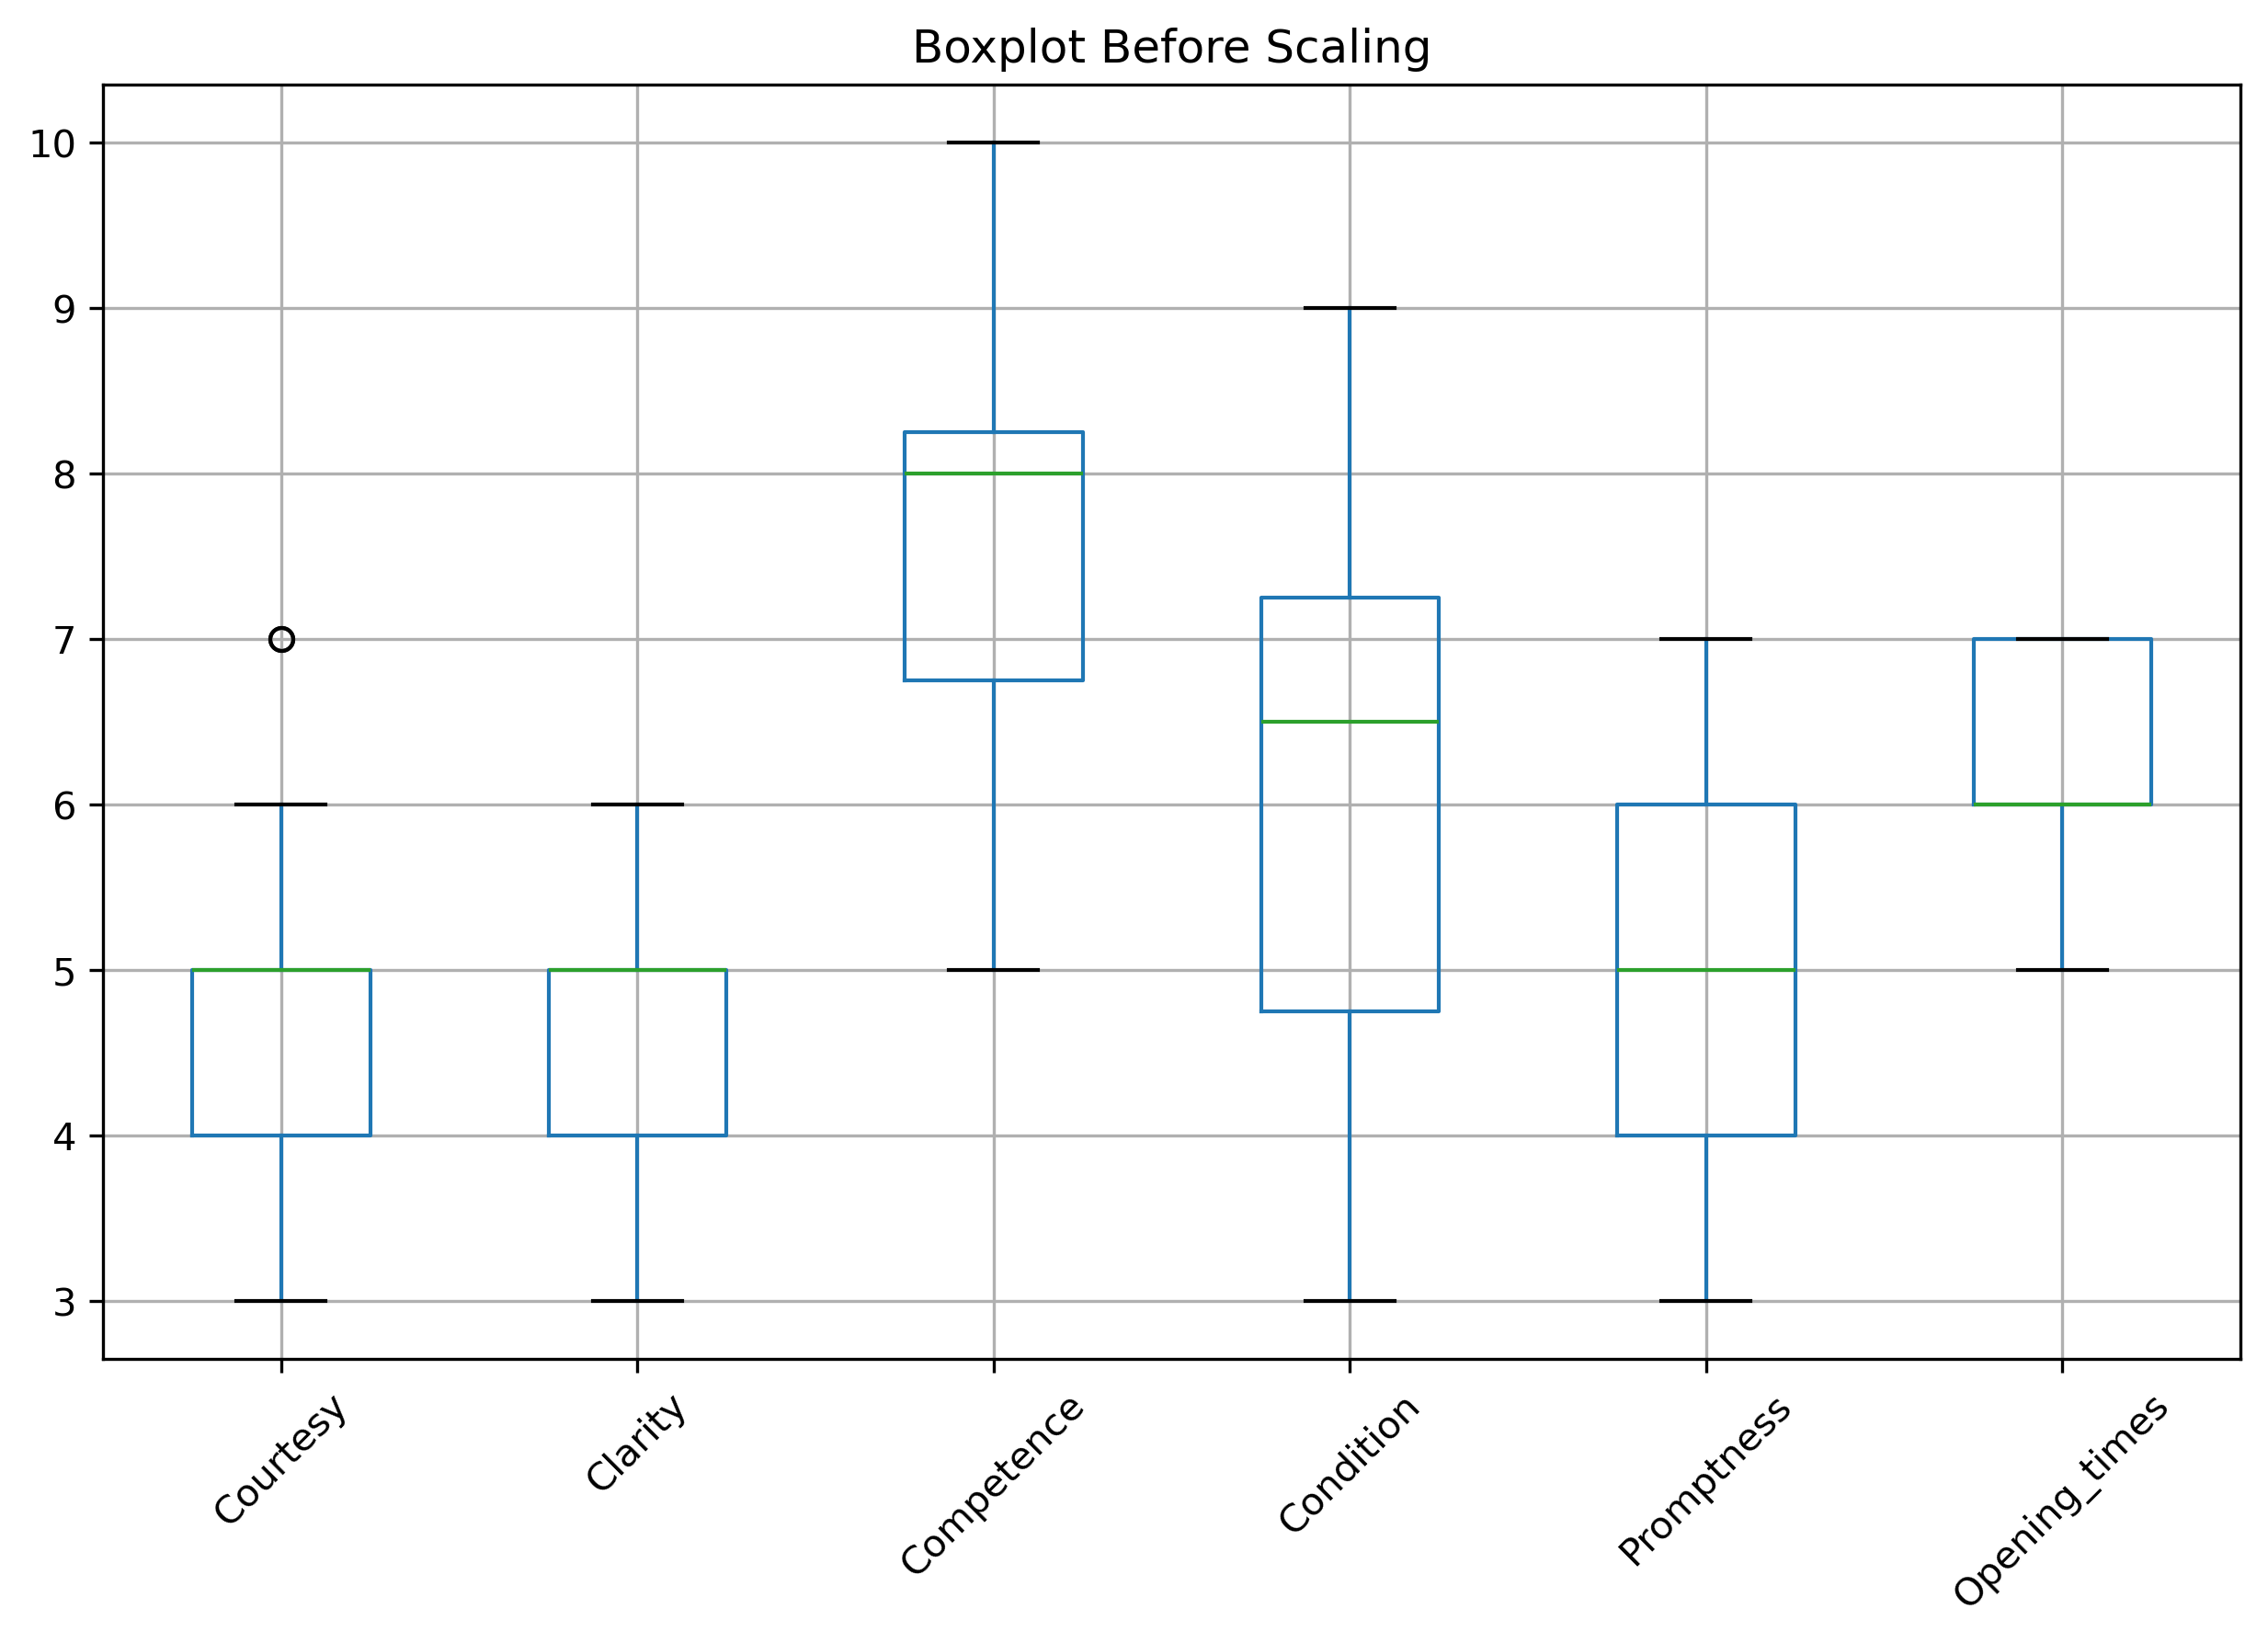

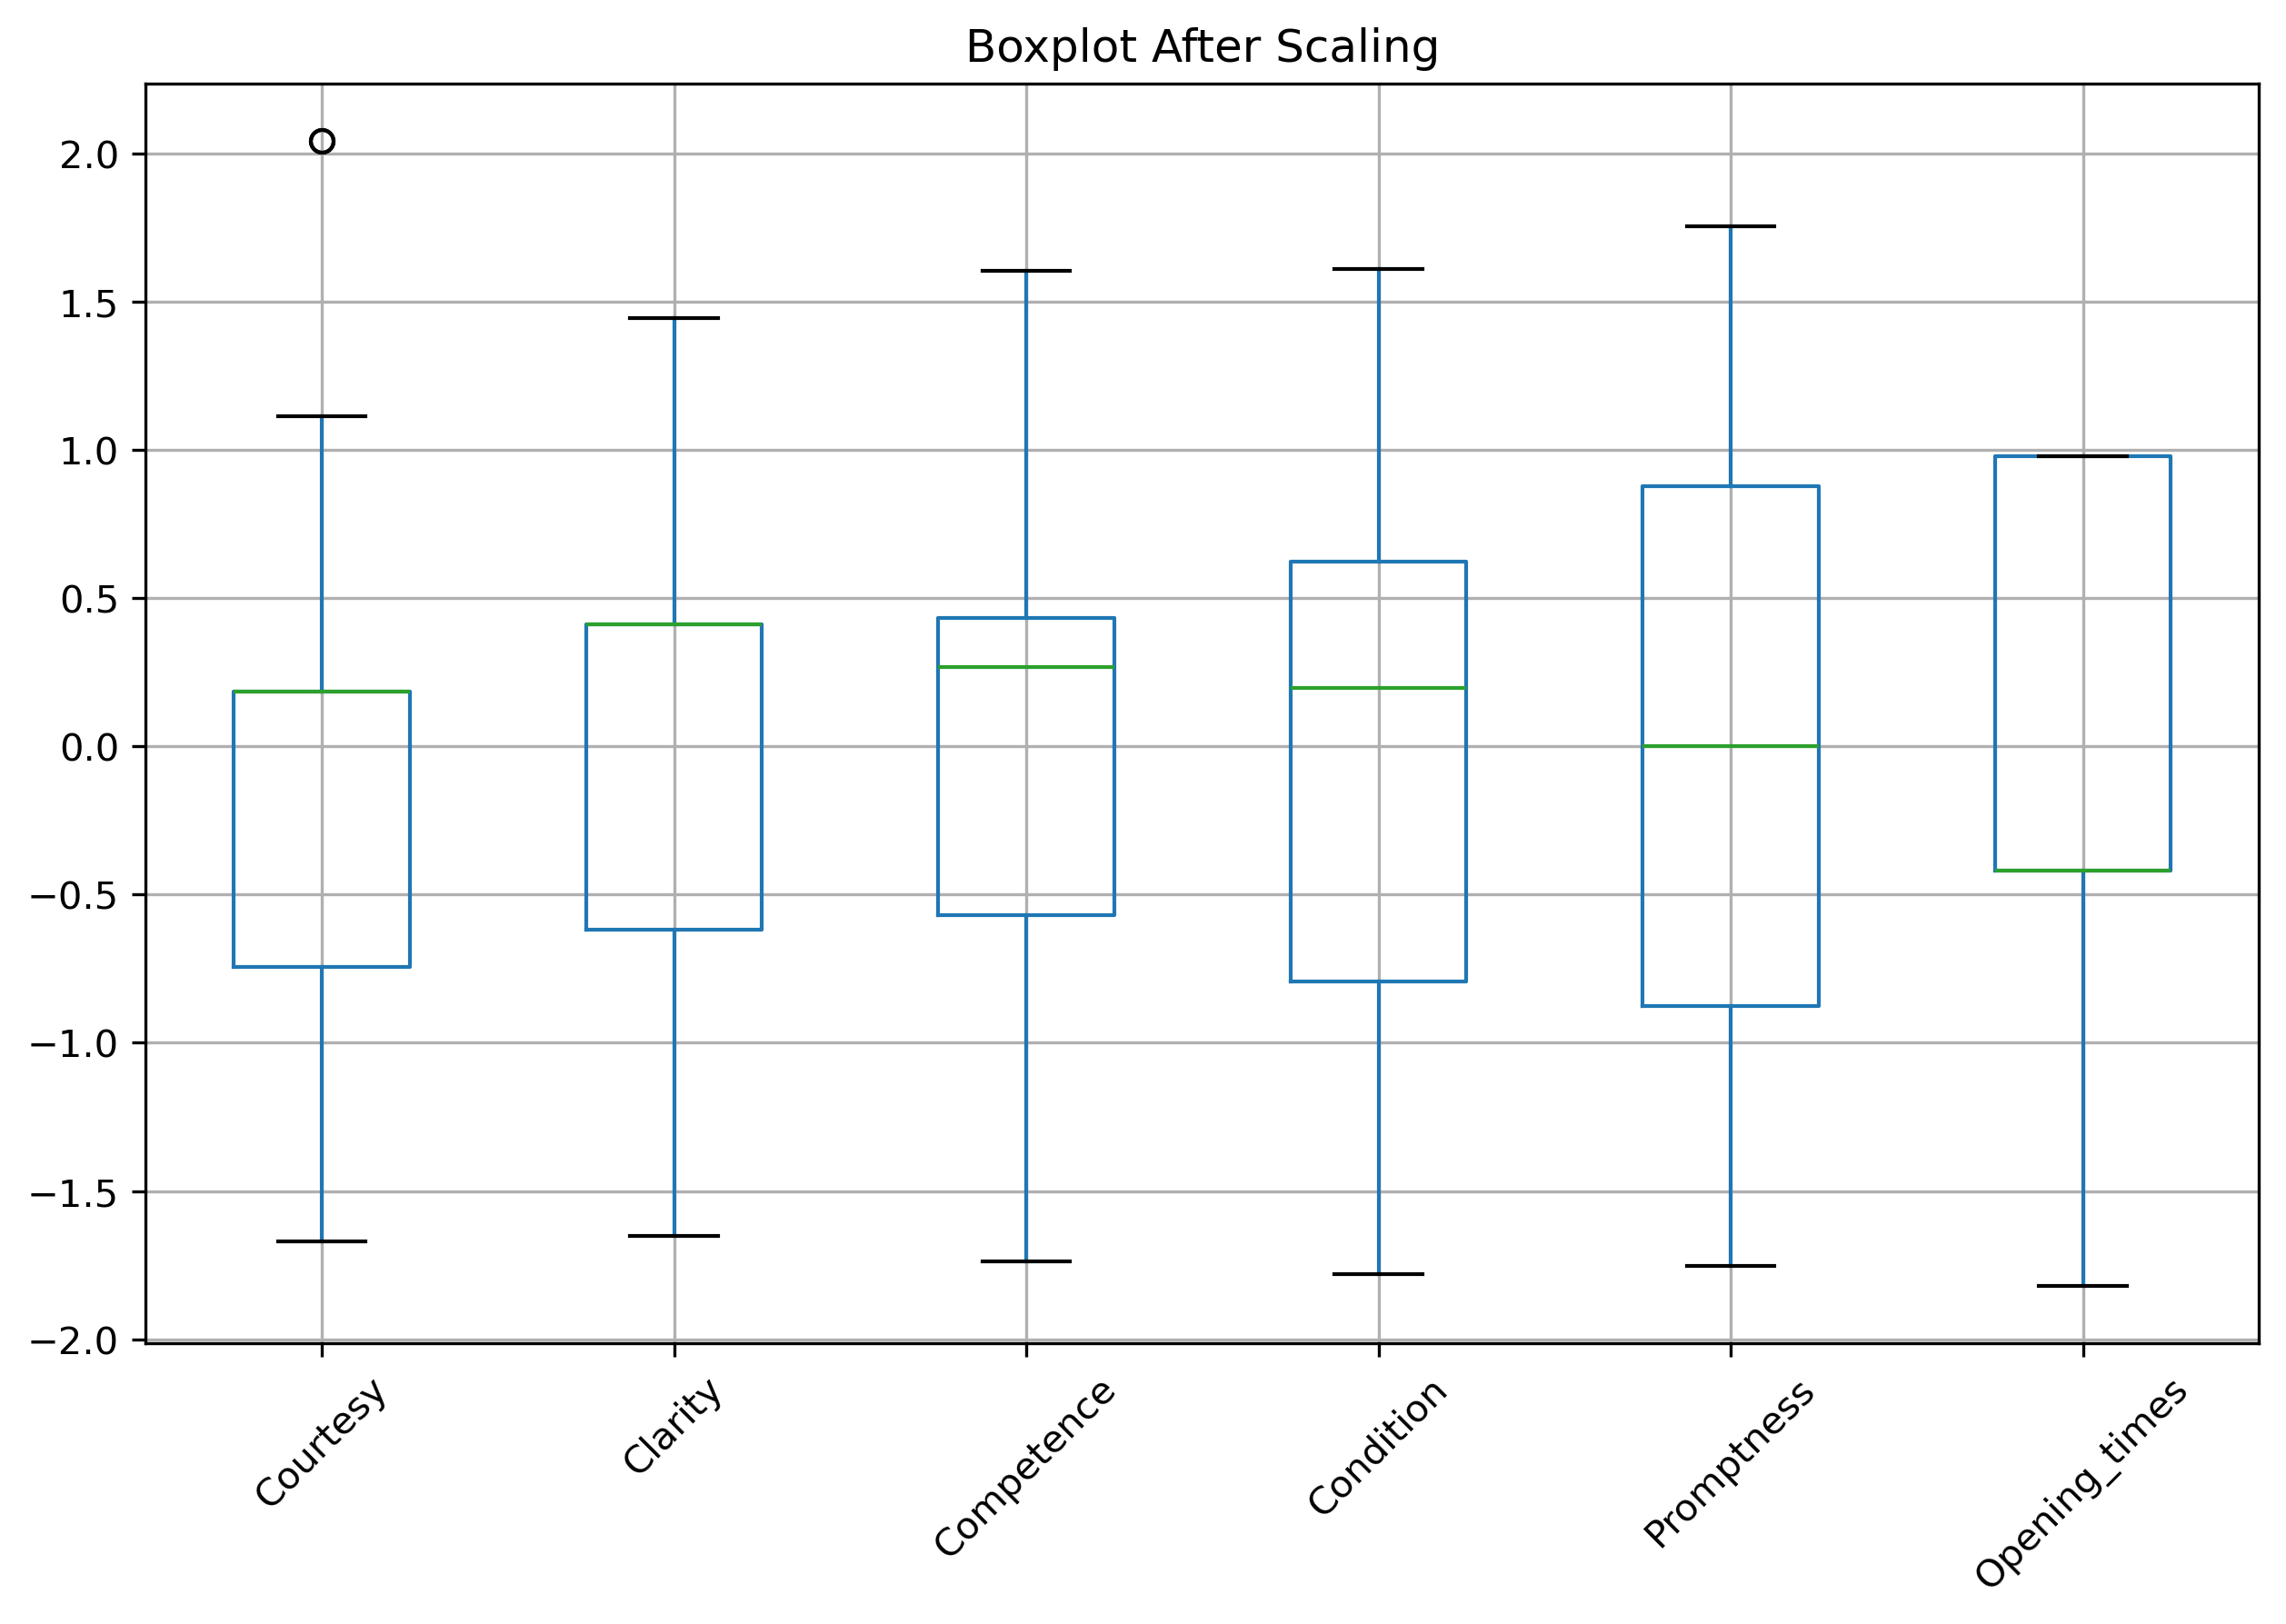

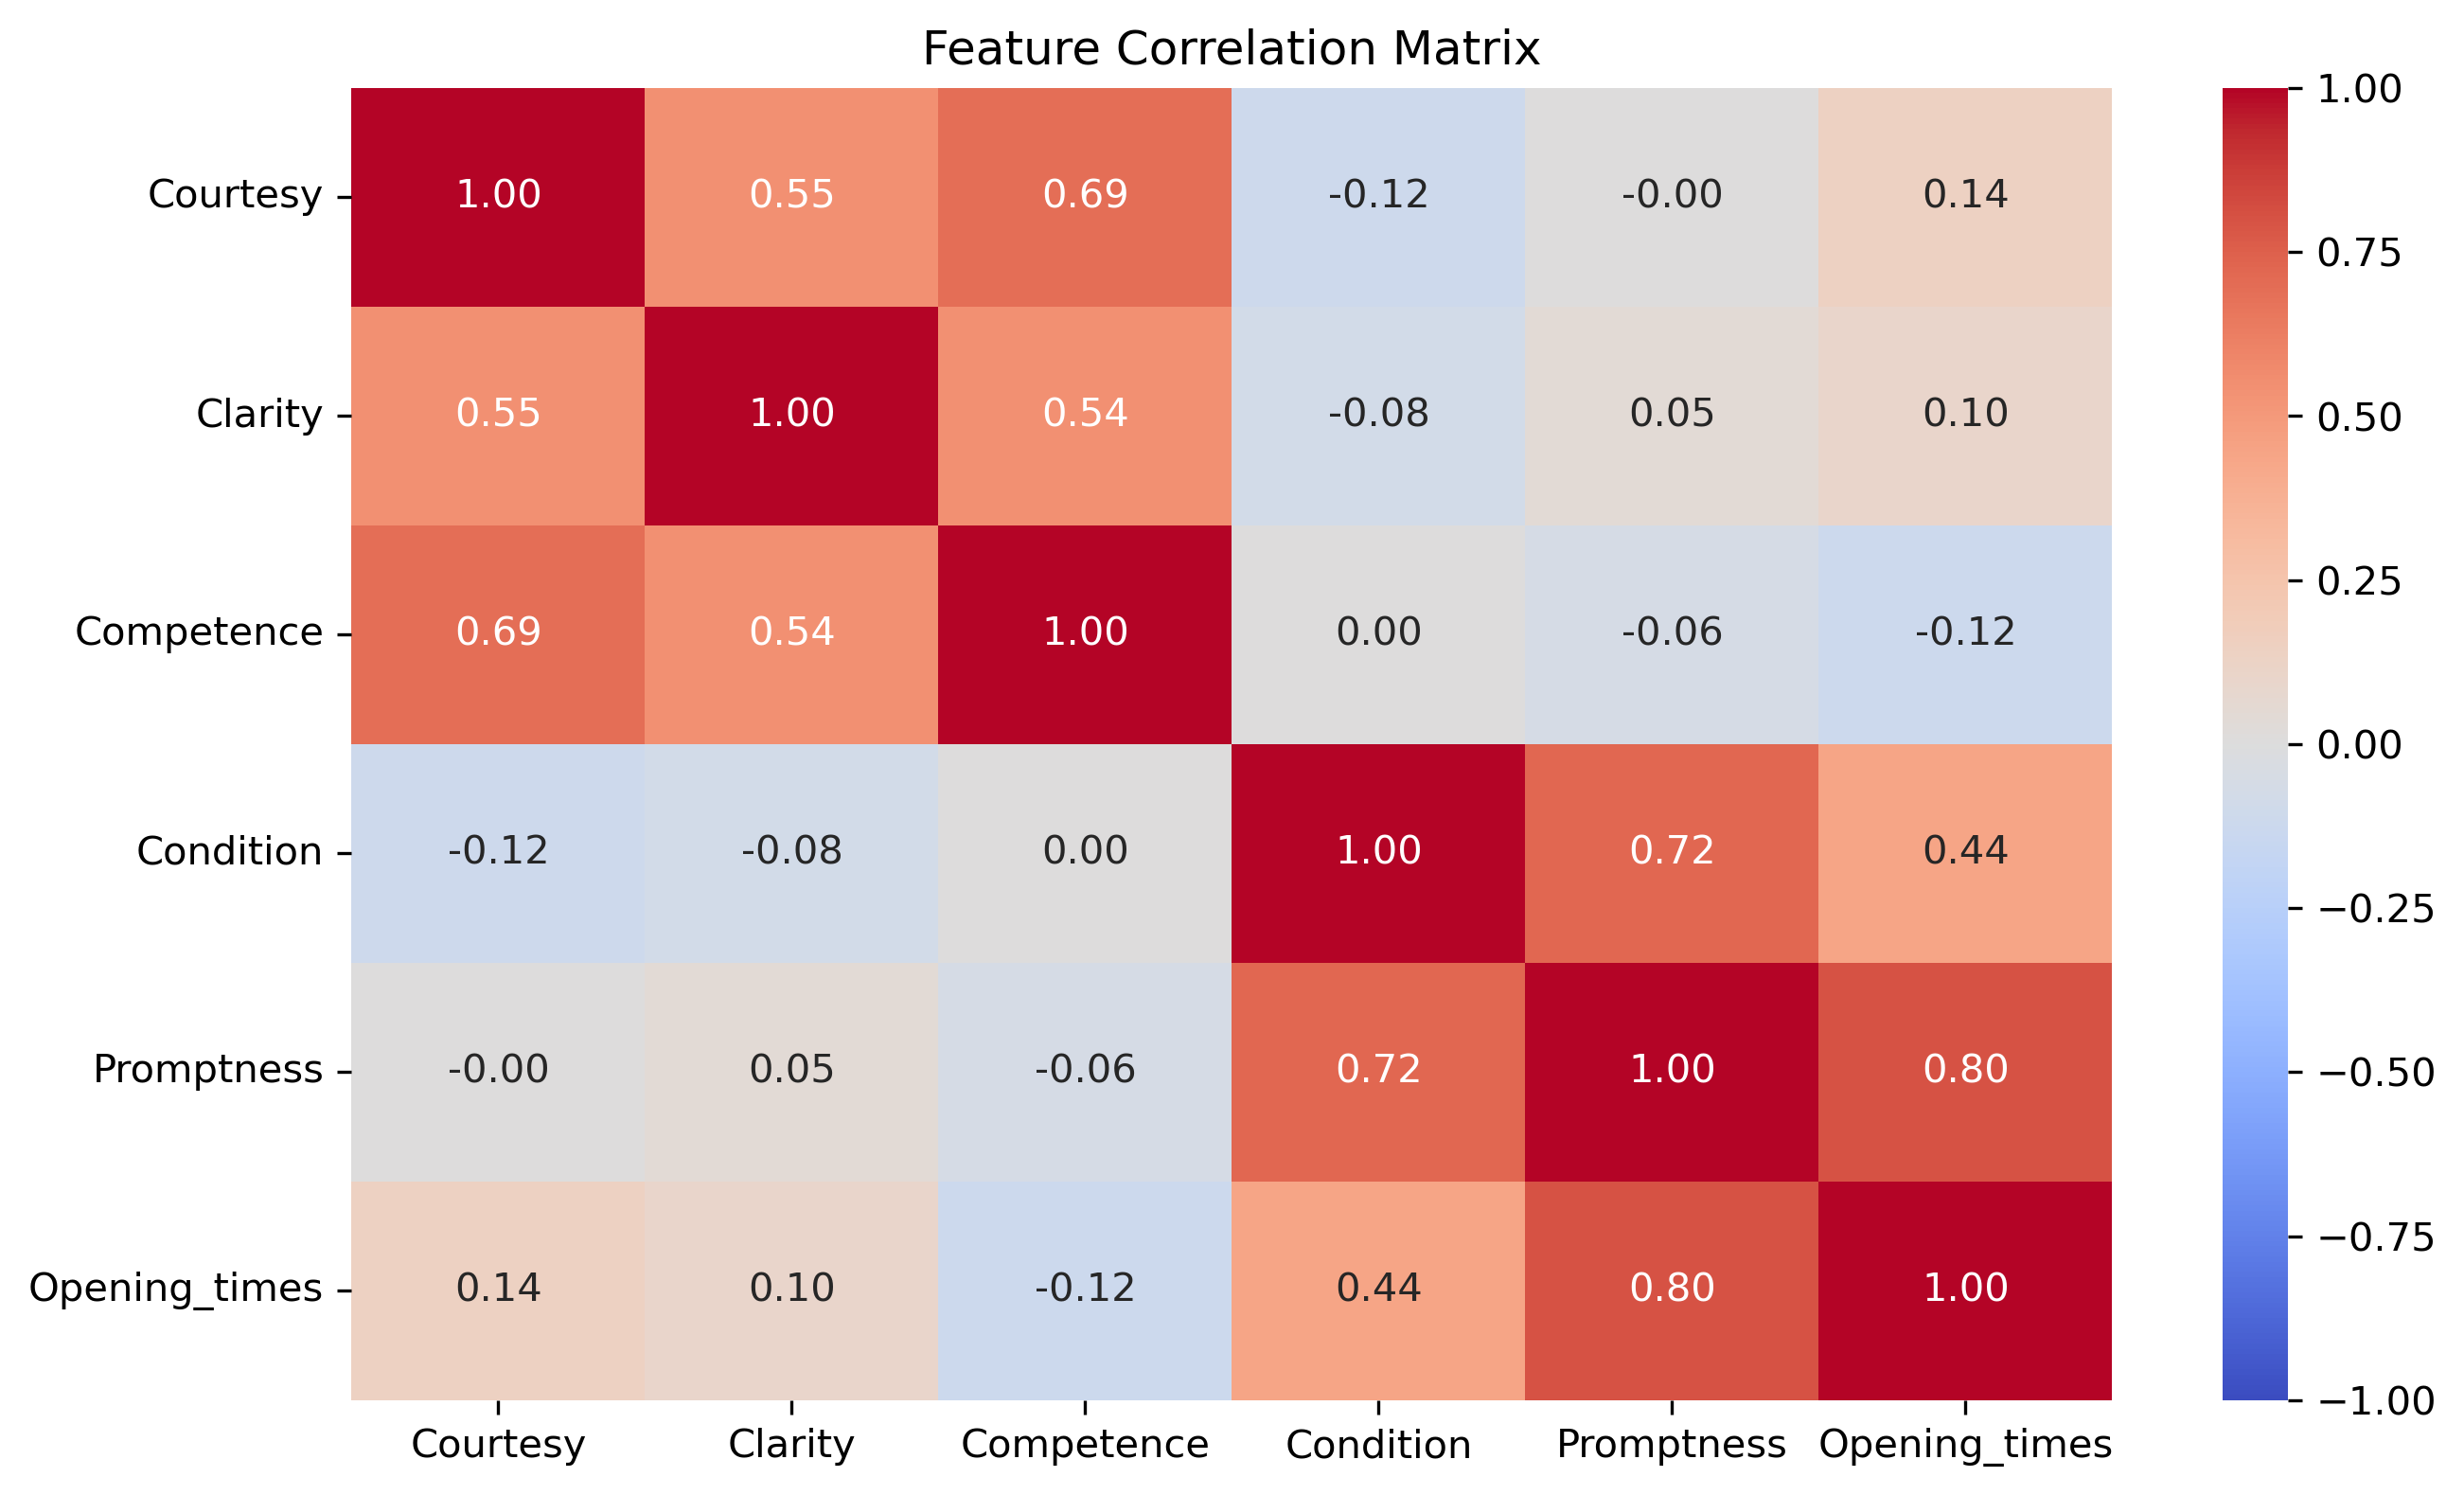

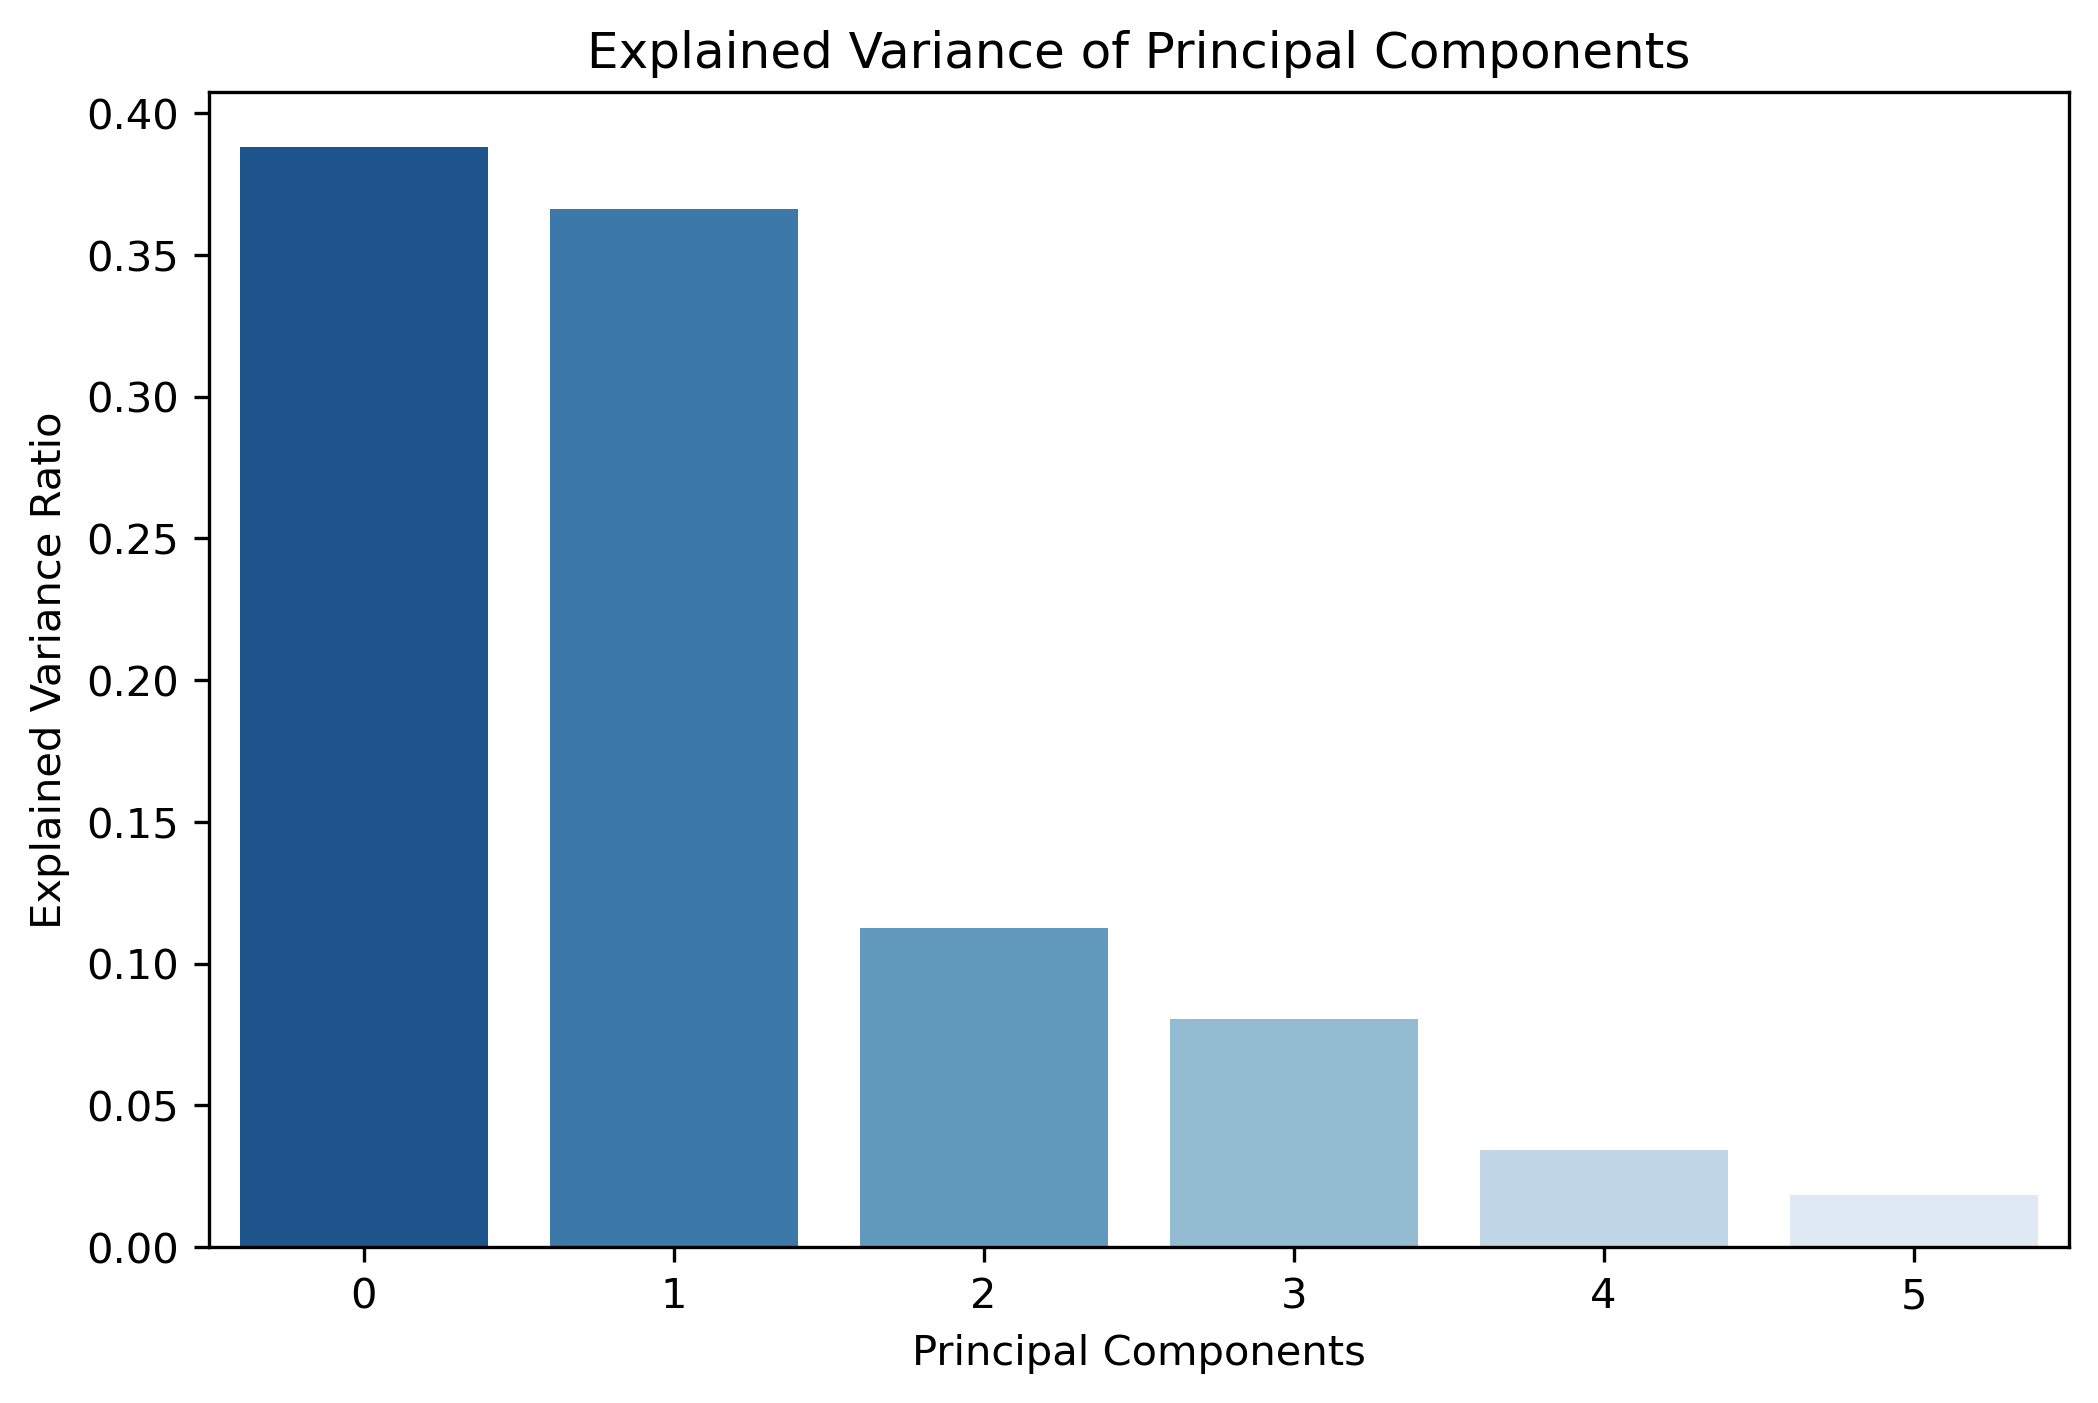

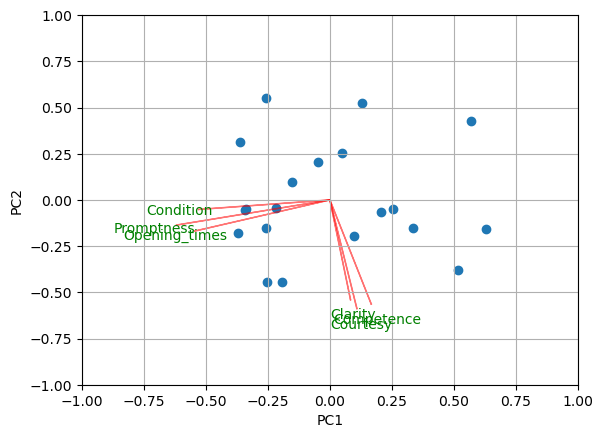

In [17]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()

#Call the function. Use only the 2 PCs.
myplot(pca.transform(df2_scaled)[:,0:2],np.transpose(pca.components_[0:2, :]), df2.columns)

**1st component**:

The variables

   - Condition
   - Promptness
   - Opening-times

show a high correlation with the first component. This component can be summarized as an index of the **structure’s performances**

**2nd component**:

The variables
   - Courtesy
   - Clarity
   - Competence

show a high correlation with the second component. 
This component can be summarized as an index of the **personnel’s performance**

**Notice that the Principal Components have negative values in the variables that they explain.**

In [21]:
df2_pca.columns=['PC1','PC2','PC3','PC4','PC5','PC6']
df2_pca

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.213592,-2.284217,0.227626,0.943510,0.639256,0.028990
1,1.595084,-0.785365,-0.803792,-0.889361,-0.095906,-0.086024
2,-1.768841,-0.908673,-0.239397,-0.098422,-0.453160,0.563923
3,-0.930384,-2.266028,-0.278082,-0.290028,0.018155,-0.015550
4,2.474352,-1.951528,-0.139969,1.153190,0.197307,-0.571159
5,0.983820,-0.337580,-0.430245,1.220114,-0.102566,0.764267
6,3.007233,-0.806971,0.268340,-1.046038,-0.017288,-0.045829
7,1.211056,-0.258626,-0.183017,-0.155048,0.018583,-0.230788
8,-0.224336,1.040537,0.592068,-0.125843,0.048535,0.033514
9,-1.227878,-0.789717,-0.222861,-0.077645,-0.212176,-0.071421


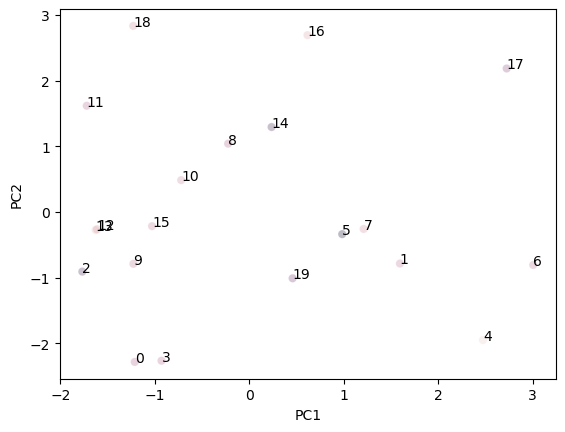

In [23]:
p1=sns.scatterplot(x="PC1", y="PC2",
              alpha=.3, 
              hue="PC6", legend=False,
              data=df2_pca);

# add annotations one by one with a loop
for line in range(0,df2_pca.shape[0]):
     p1.text(df2_pca.PC1[line], df2_pca.PC2[line], line, horizontalalignment='left', size='medium', color='black')


We conclude that 
 - centers 18,11 has a GOOD infrastructure but a BAD service
 - the group near 1,4,6 has BAD infrastructure but GOOD service quality 
 - the group 0,3,2,9 has GOOD infrastructure and service
 - center 17 has BAD infrastructure and service!

# MTCARS

The car types are a mix that includes sedans (Datsun, Ford, Honda,…), luxury sedans (Mercedes, Cadellac,..), muscle cars (Javelin, Challenger, Camaro…) and high-end sports cars (Porsche, Lotus, Maserati, Ferrari…)

- 	mpg 	Miles/US Gallon 	mpg is the determinant of fuel efficiency
- 	cyl 	Number of cylinders 	Data includes vehicles with 4,6,8 cylinder engines.
- 	disp 	Displacement (cu.in.) 	Displacement measures overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric gives a good proxy for the total amount of power the engine can generate.
- 	hp 	Gross horsepower 	Gross horsepower measures the theoretical output of an engine’s power output
- 	drat 	Rear axle ratio 	The rear axle gear ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle. 
-   wt      weigth of the car 
- 	qsec 	1/4 mile time 	A performance measure, primarily of acceleration. Fastest time to travel 1/4 mile from standstill (in seconds).
- 	vs 	V/S 	Binary variable signaling the engine cylinder configuration a V-shape (vs=0) or Straight Line (vs=1). V==0 and S==1. 
- 	am 	Transmission Type 	A binary variable signaling whether vehicle has automatic (am=0) or manual (am=1) transmission configuration.
- 	gear 	Number of forward gears 	Number of gears in the transmission.
- 	carb 	Number of carburetors 	The number of carburetor barrels.

<div style="border: 2px solid darkblue; padding: 10px; background-color: #89D9F5;">

### **Exercise - PCA on the `mtcars` Dataset: Standardization & Principal Component Analysis**

#### **Objective**
- Apply **Principal Component Analysis (PCA)** to the **`mtcars` dataset**.
- Standardize the dataset using **StandardScaler**.
- Compute and interpret **principal components**.
- Visualize how the dataset changes after **PCA transformation**.

---

#### **Instructions**
1. **Load and Inspect the Dataset**:
   - Read the `mtcars.csv` dataset into a Pandas DataFrame.
   - Display the first few rows to understand the structure.

2. **Standardize the Data**:
   - Use `StandardScaler()` to normalize the dataset.
   - Generate a **boxplot before and after scaling** to observe changes.

3. **Apply PCA to the Standardized Data**:
   - Fit PCA to the standardized dataset.
   - Extract and print **principal components**.

4. **Visualize Principal Component Loadings**:
   - Display how the original features contribute to the principal components.

5. **Analyze Explained Variance**:
   - Compute **explained variance ratio** for each principal component.
   - Plot the **cumulative explained variance** to determine the optimal number of components.

---

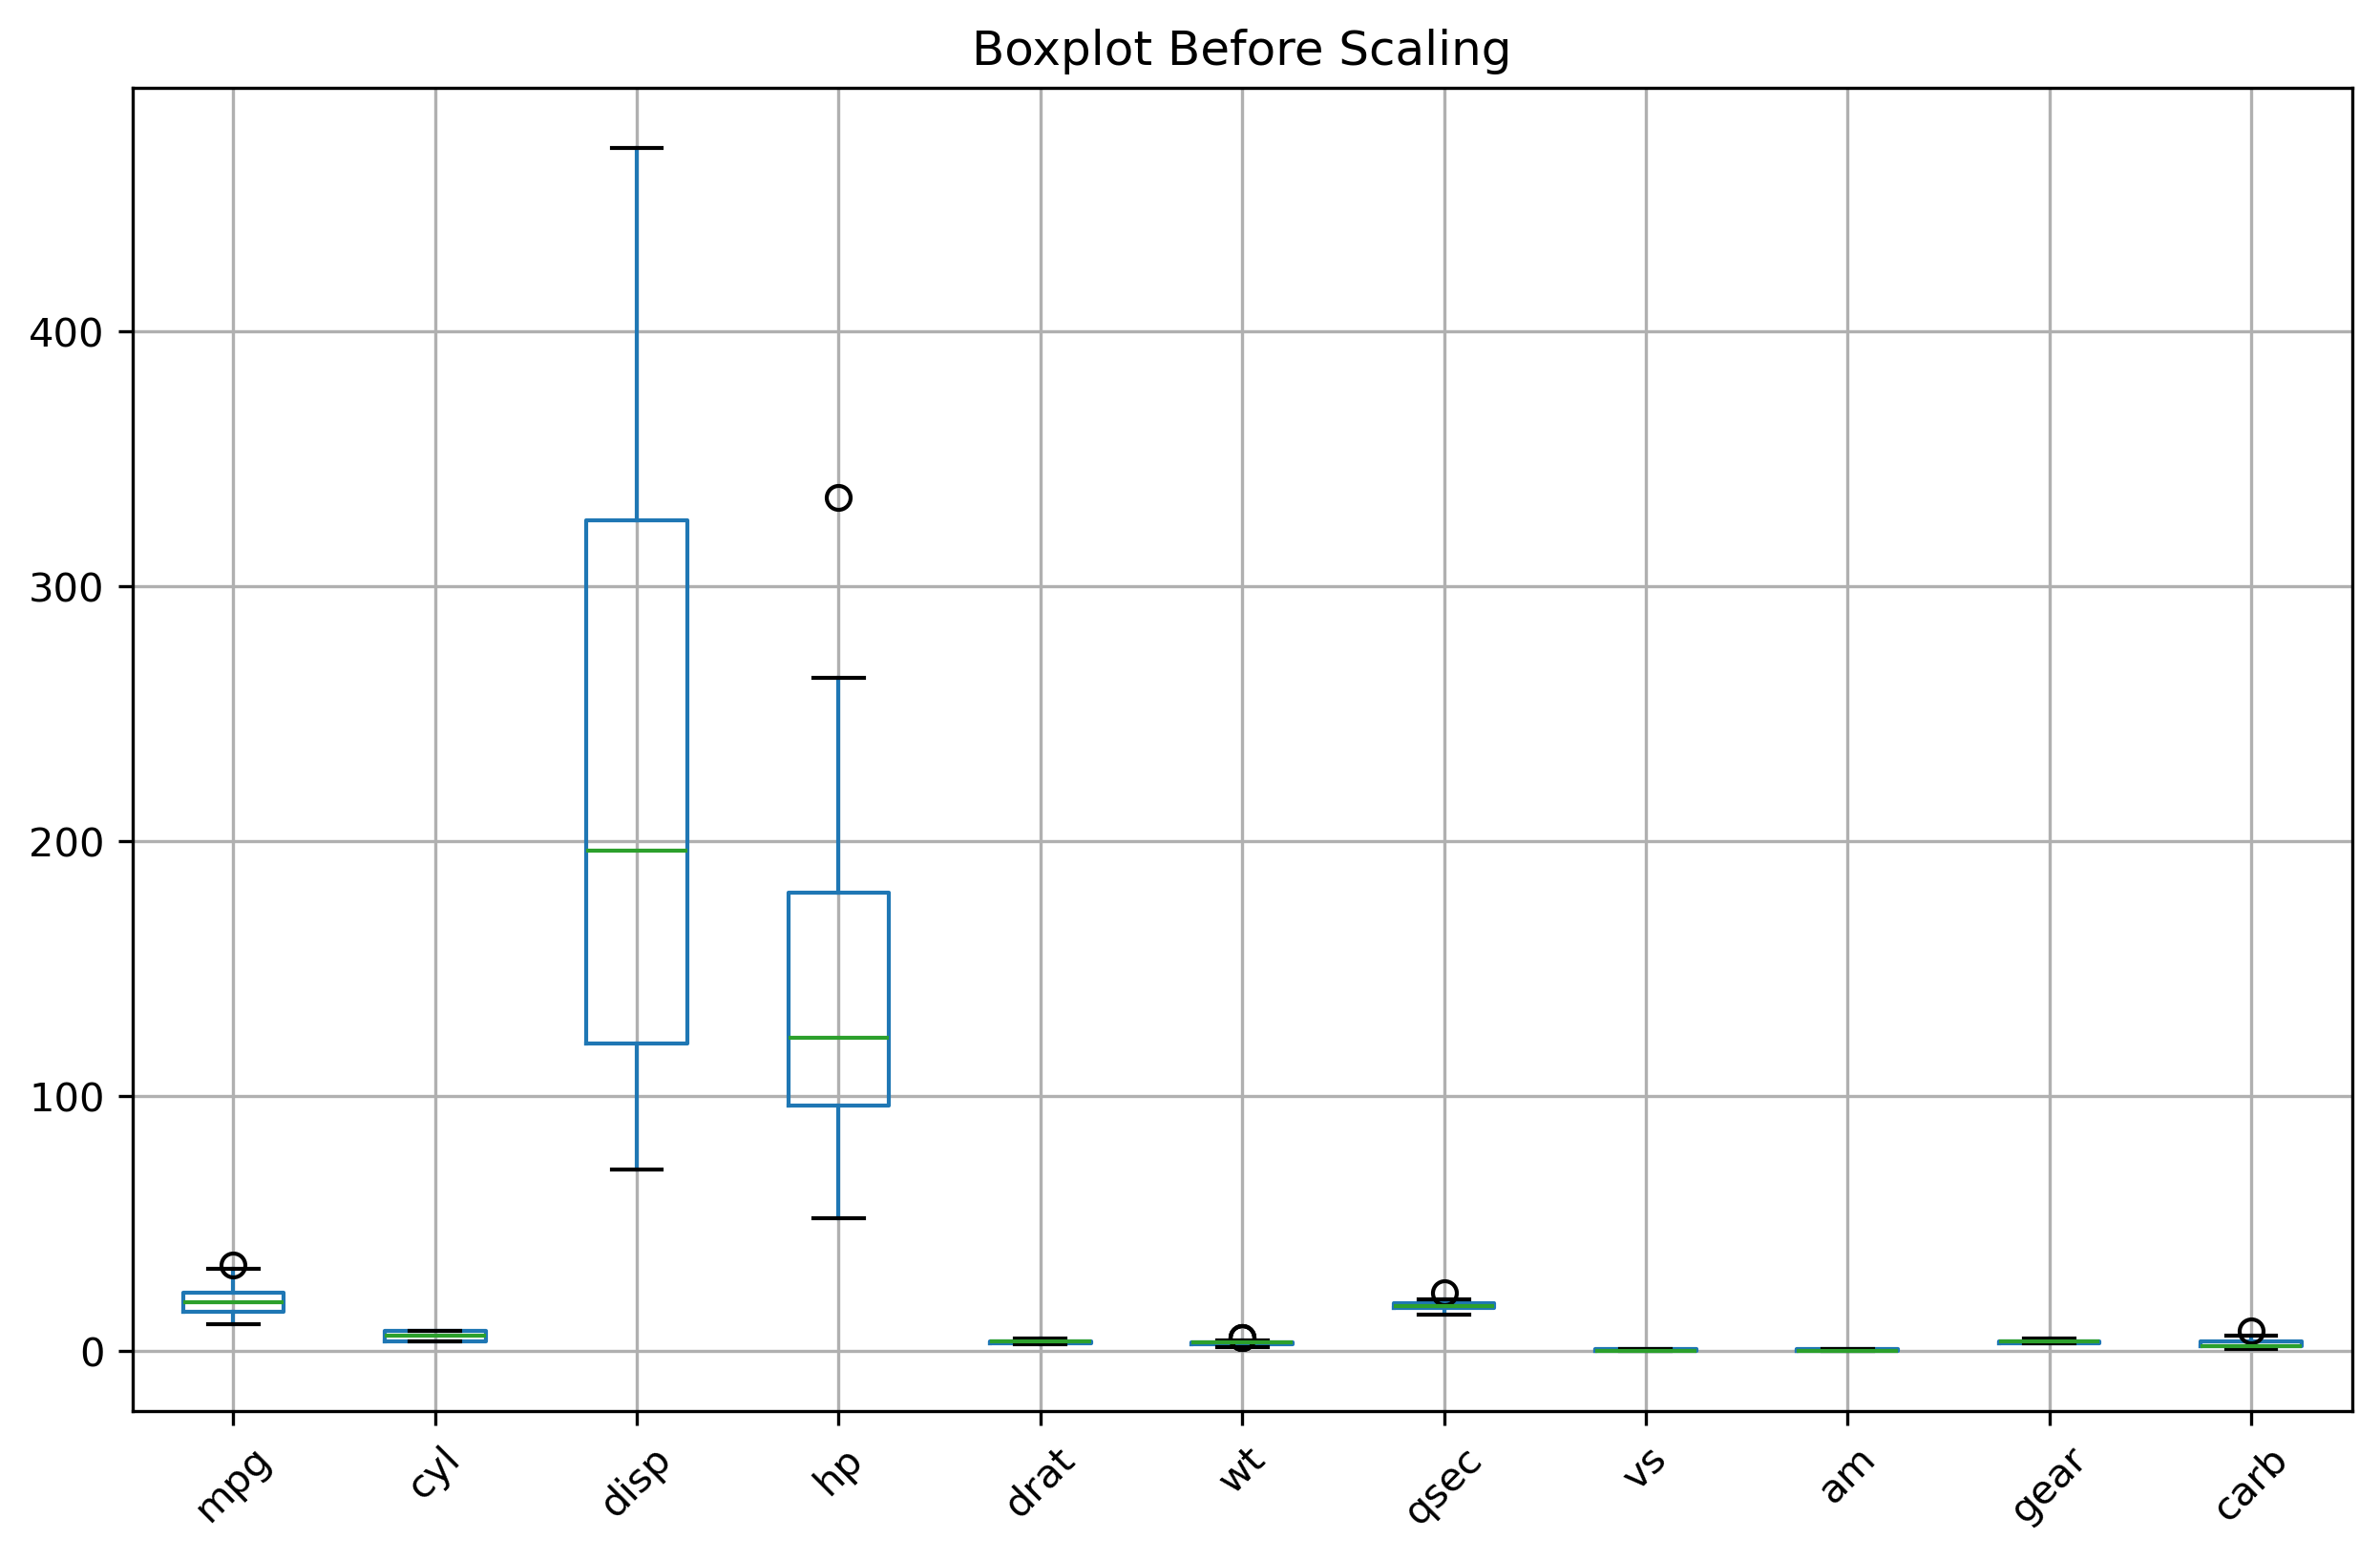

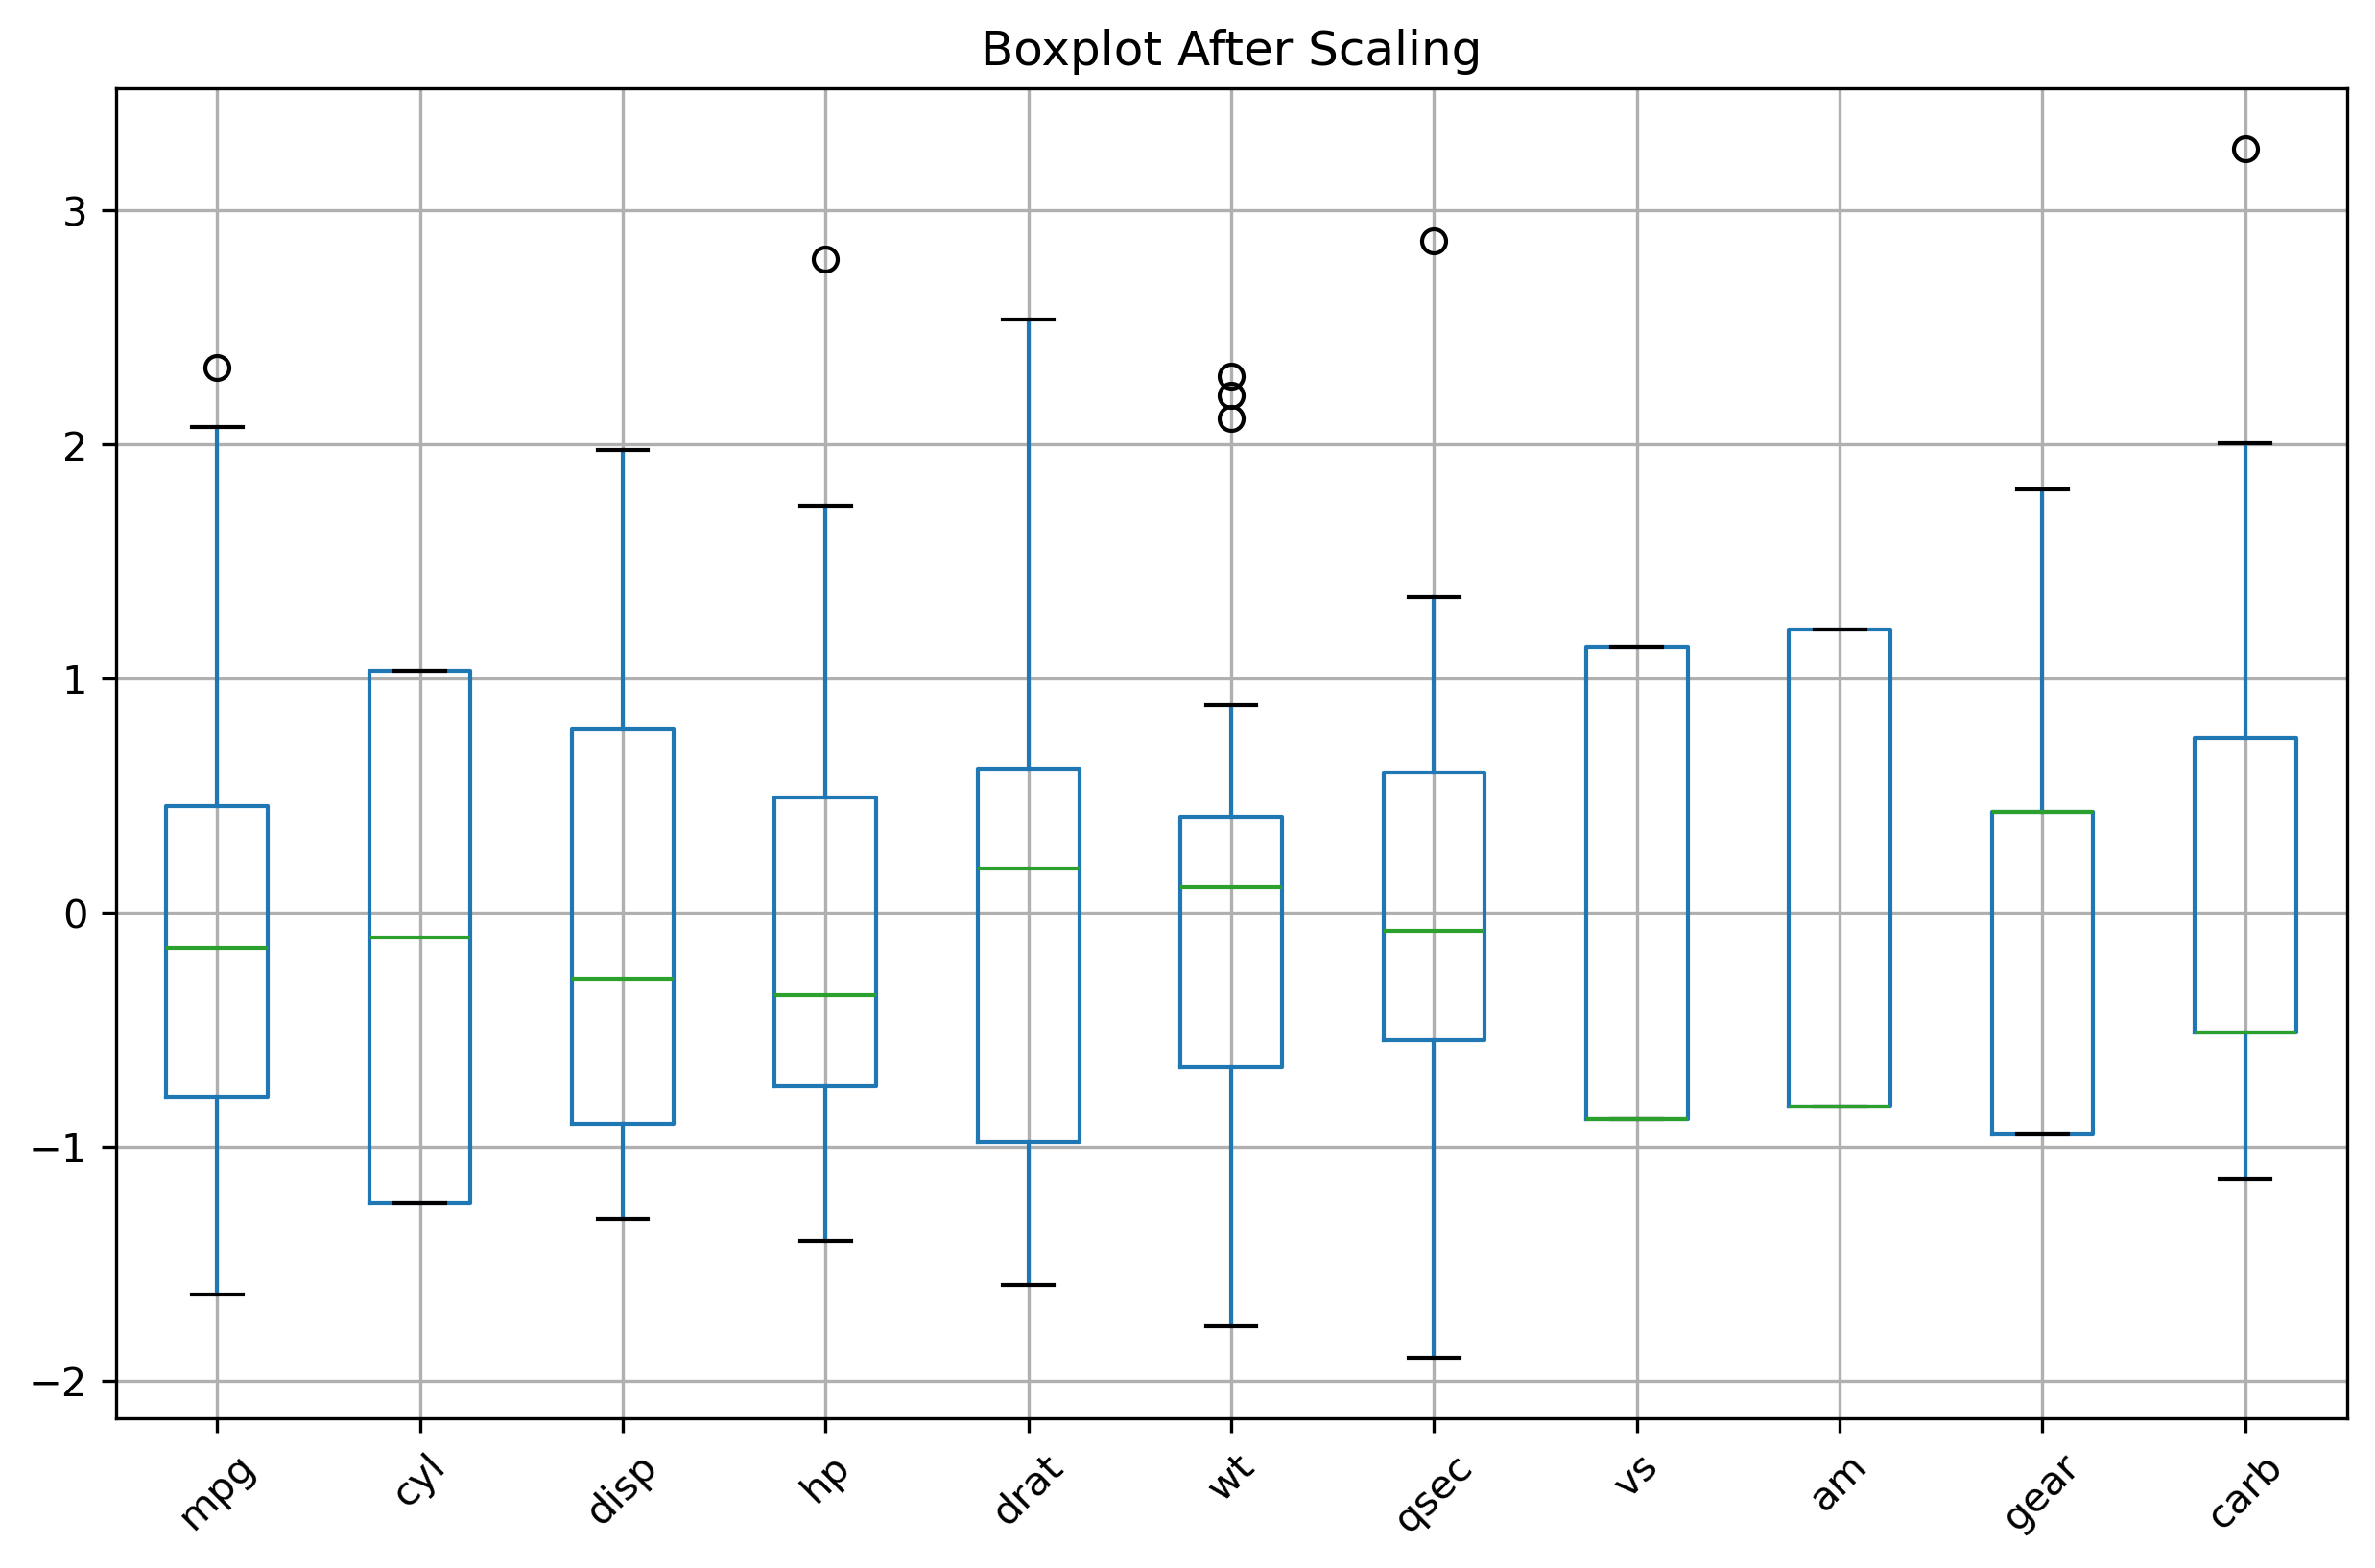

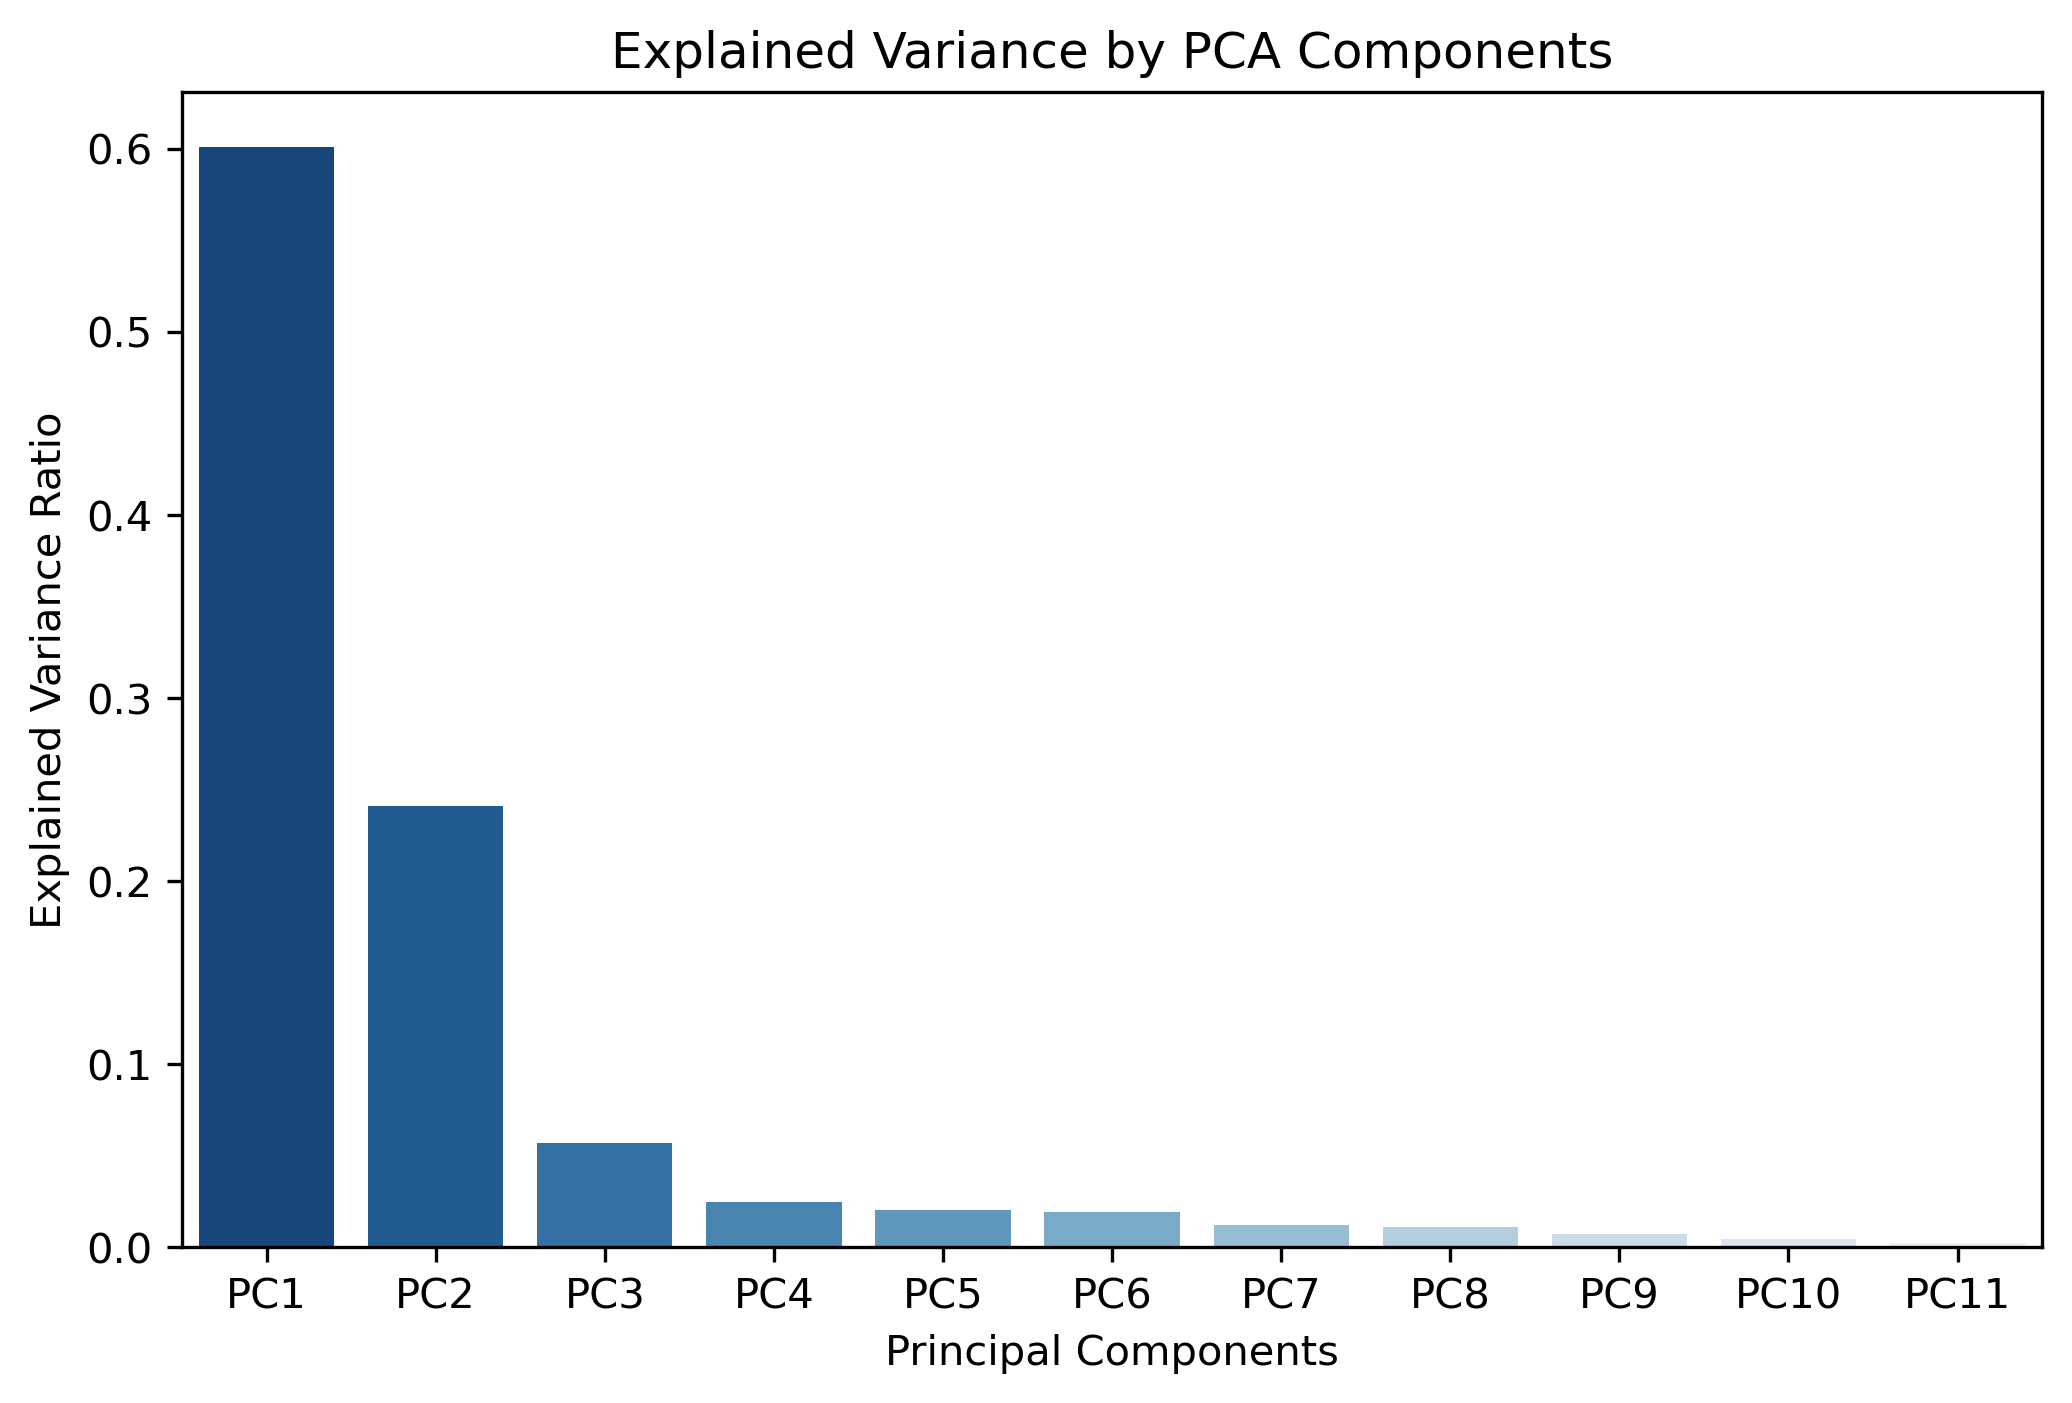

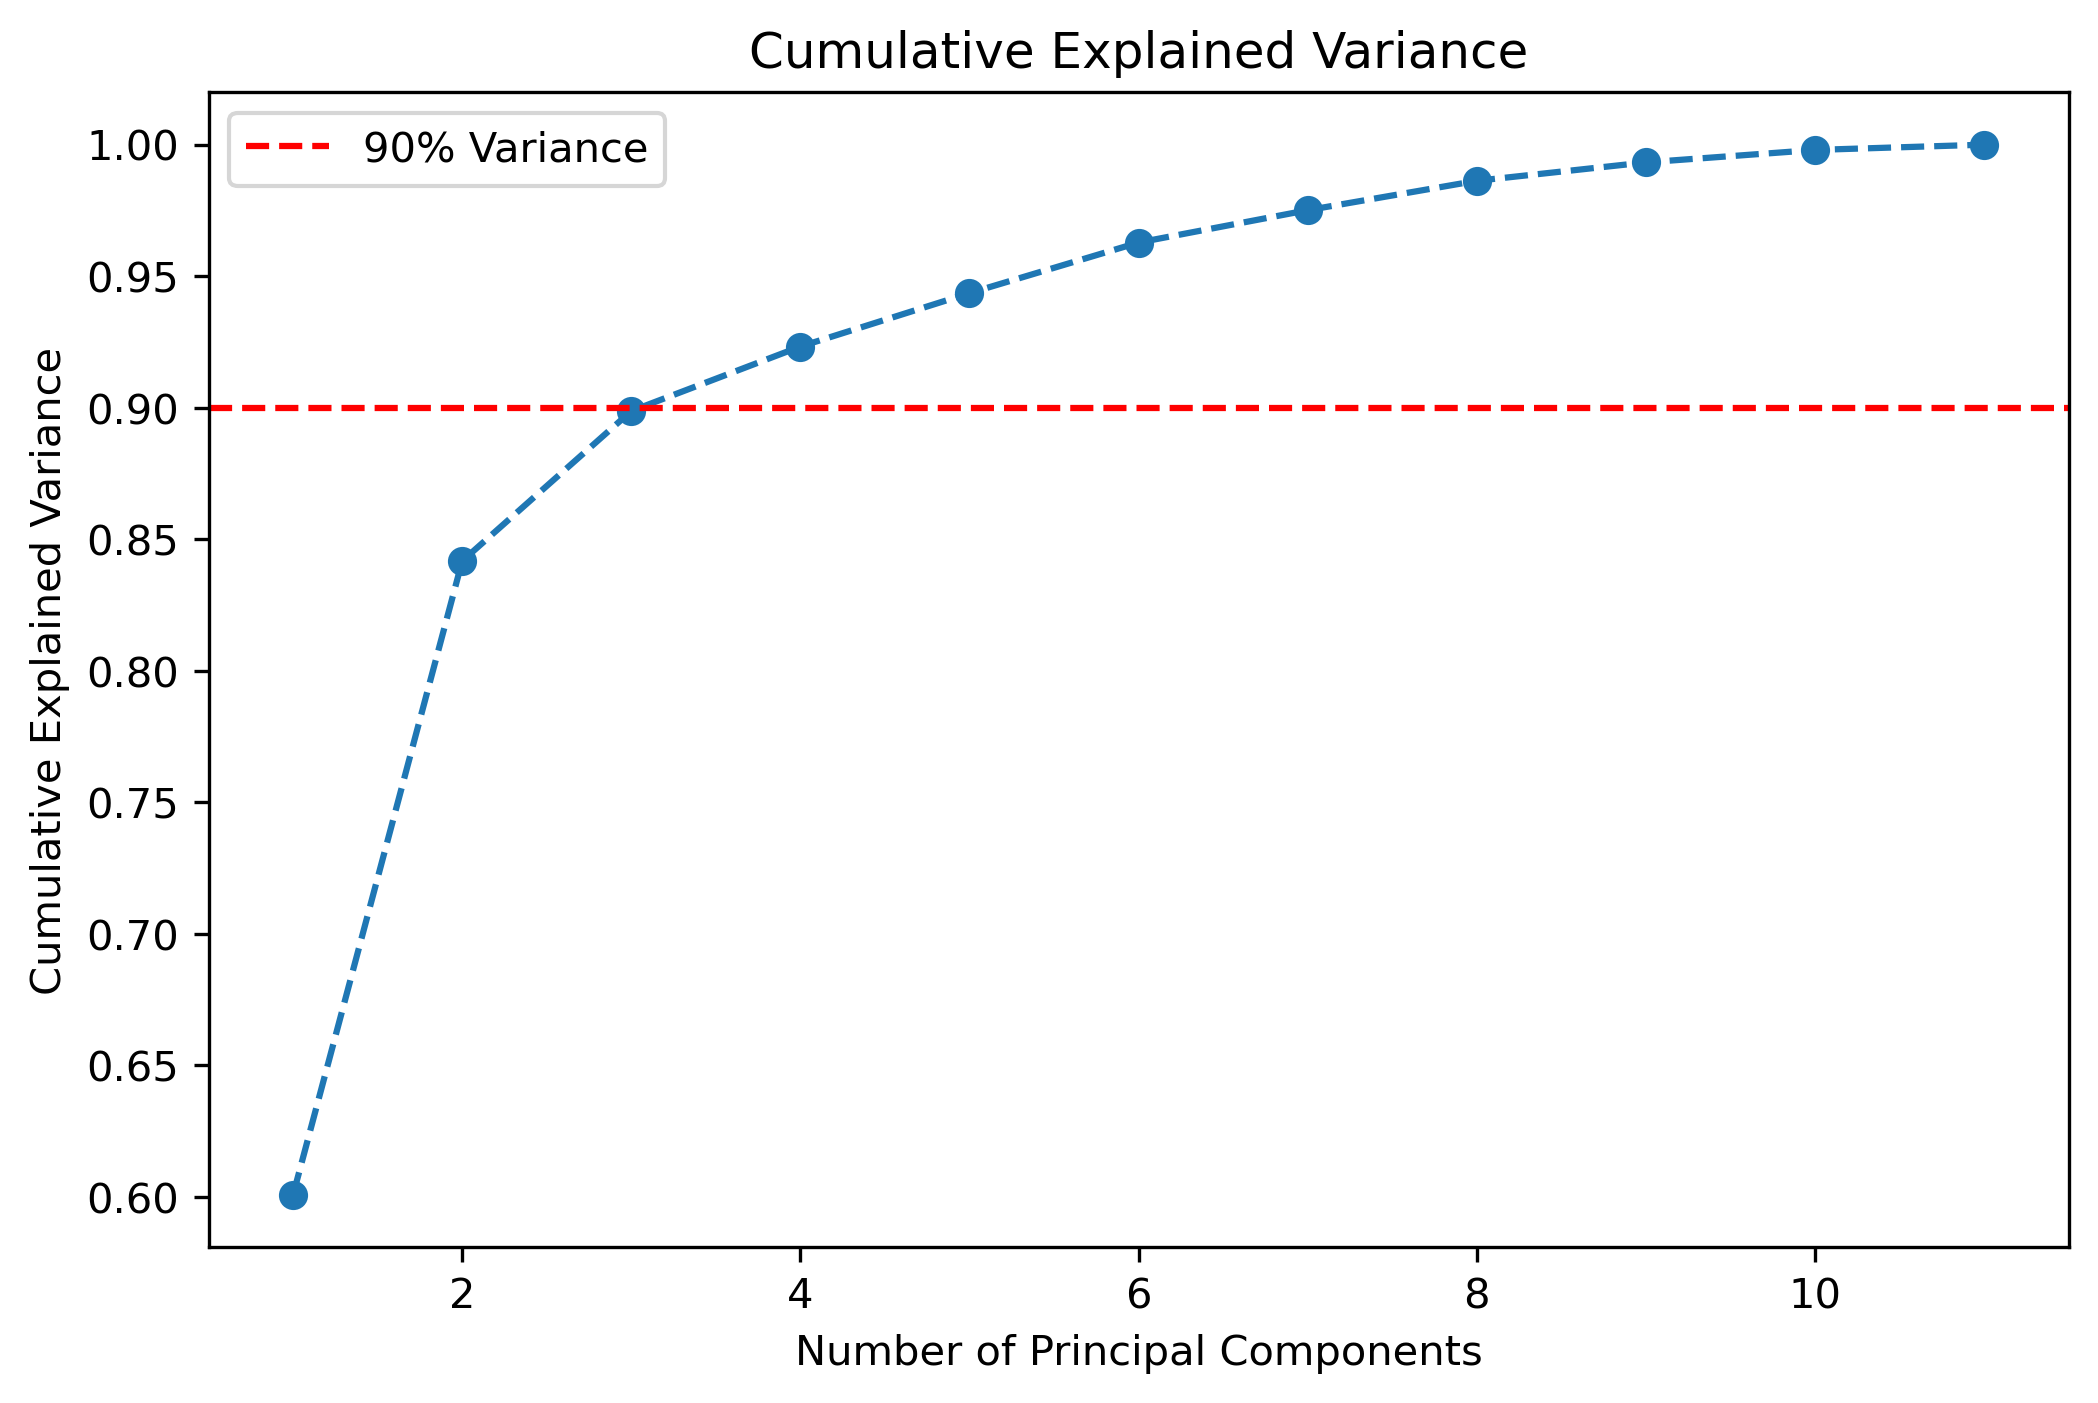

In [13]:
#modify with your variables
cars_pca = pd.DataFrame(pca.transform(df_cars),columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9','pc10','pc11']
                        ,index=cars.index.values)
cars_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
Mazda RX4,0.657213,1.735446,-0.601199,0.115522,-0.960653,-0.017259,-0.433311,0.009785,-0.148766,-0.067771,-0.182569
Mazda RX4 Wag,0.629396,1.550033,-0.382322,0.202307,-1.032949,-0.245592,-0.422860,0.085873,-0.075721,-0.128959,-0.090063
Datsun 710,2.779397,-0.146457,-0.241238,-0.249139,0.405143,-0.354348,-0.618584,-0.594620,0.133328,0.046470,0.096147
Hornet 4 Drive,0.311771,-2.363019,-0.135759,-0.511862,0.557997,0.019606,-0.041007,0.050376,-0.223742,-0.061366,-0.149973
Hornet Sportabout,-1.974489,-0.754402,-1.134402,0.075653,0.210836,0.151580,0.389645,0.162863,0.021515,-0.060787,-0.148750


/var/folders/mn/rzjlcs791970gbxf6my2jtpw0000gp/T/ipykernel_9854/2031328931.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p2.text(cars_pca.pc1[line], cars_pca.pc2[line], cars_pca.index[line], horizontalalignment='left', size='medium', color='black')


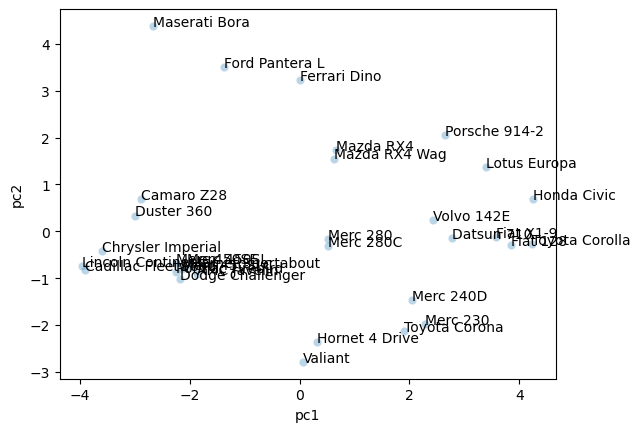

In [15]:
p2=sns.scatterplot(x="pc1", y="pc2",
              alpha=.3,
              data=cars_pca);
# add annotations one by one with a loop
for line in range(0,cars_pca.shape[0]):
     p2.text(cars_pca.pc1[line], cars_pca.pc2[line], cars_pca.index[line], horizontalalignment='left', size='medium', color='black')

# Iris database

<div style="border: 2px solid darkblue; padding: 10px; background-color: #89D9F5;">

### **Exercise - PCA on the Iris Dataset: Standardization & Dimensionality Reduction**

#### **Objective**
- Apply **Principal Component Analysis (PCA)** to the **Iris dataset**.
- Standardize the dataset using **StandardScaler**.
- Compute and interpret **principal components**.
- Visualize the **explained variance** and **PCA-transformed data**.

---

#### **Instructions**
1. **Load and Inspect the Iris Dataset**:
   - Load the Iris dataset from `sklearn.datasets`.
   - Convert it into a Pandas DataFrame with proper column names.

2. **Standardize the Data**:
   - Use `StandardScaler()` to normalize the dataset.
   - Generate a **boxplot before and after scaling** to observe changes.

3. **Apply PCA to the Standardized Data**:
   - Fit PCA to the scaled dataset.
   - Extract and print **principal components**.

4. **Visualize Explained Variance**:
   - Create a **bar plot** of explained variance to determine important components.

5. **Project Data onto the First Two Principal Components**:
   - Transform the dataset using the **top 2 principal components**.
   - Plot the **PCA scatter plots** to observe clustering.

---

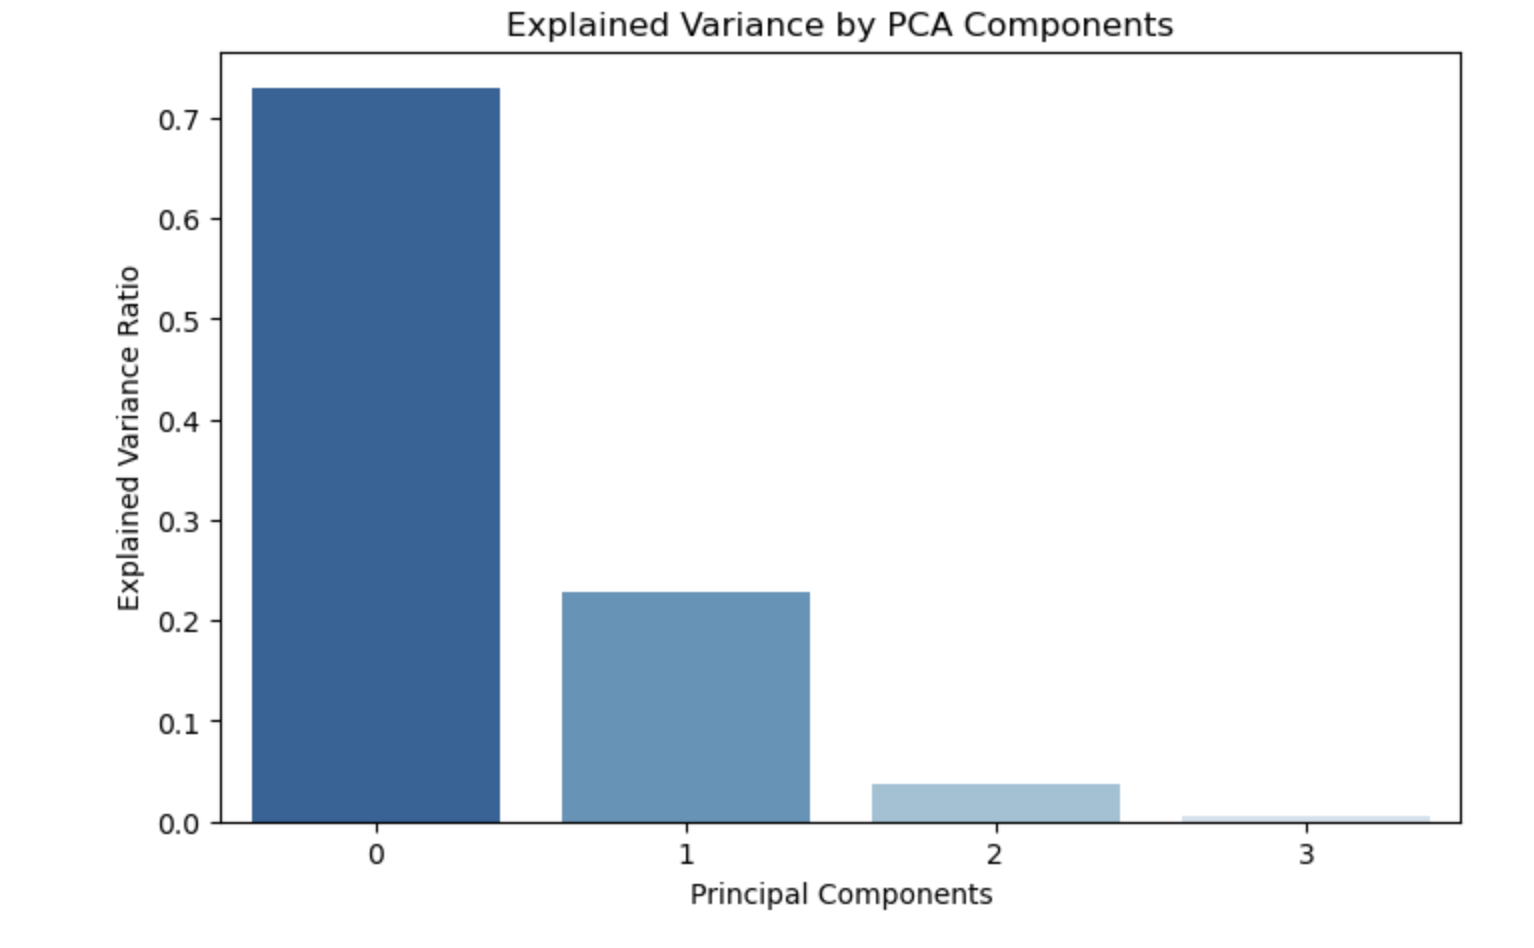

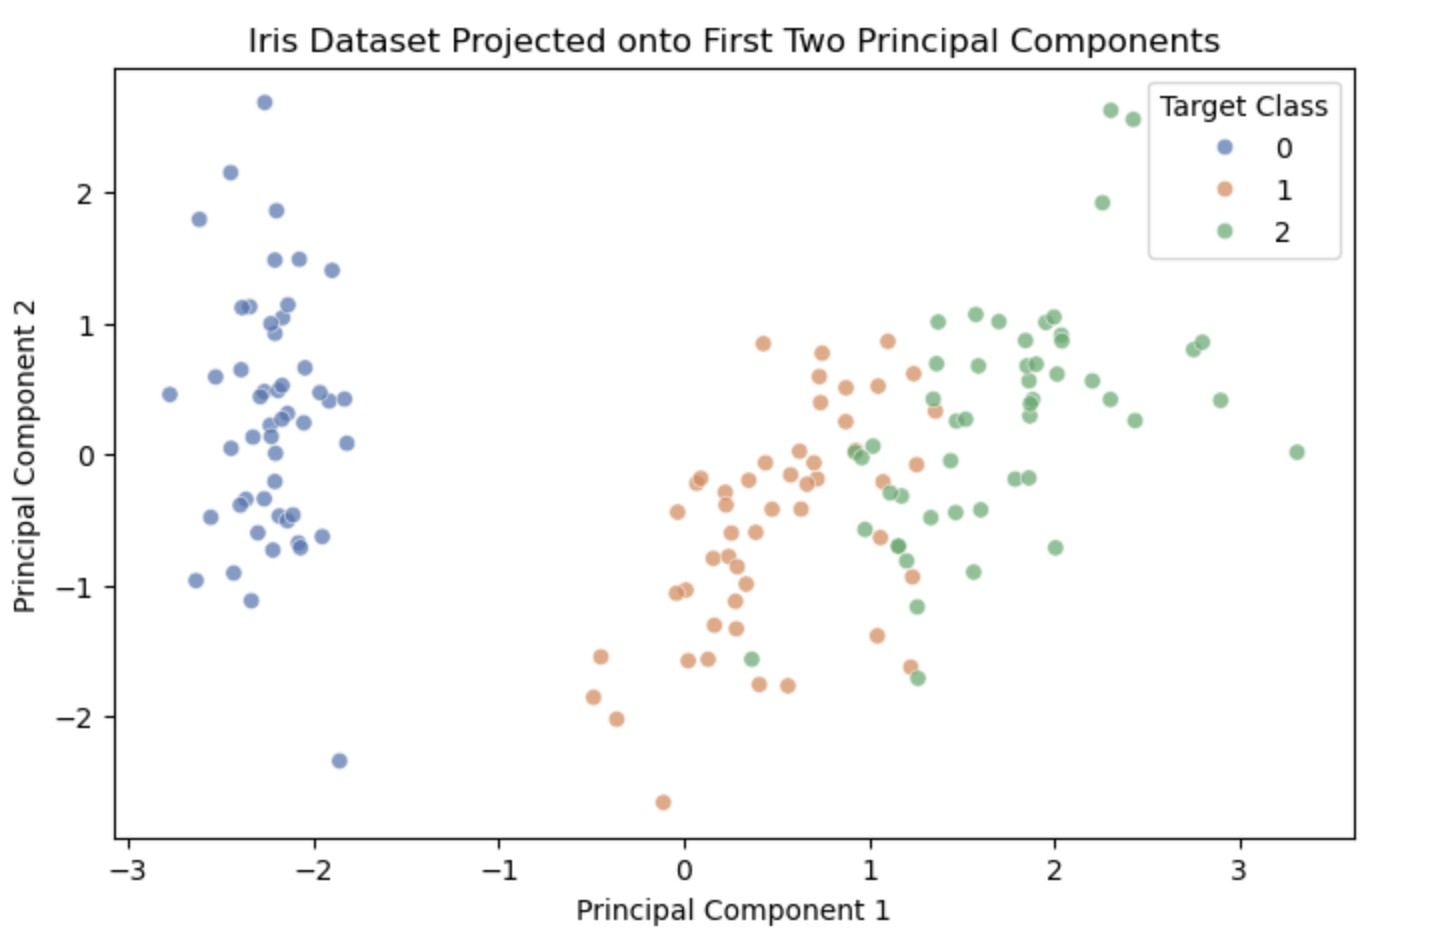